<a href="https://colab.research.google.com/github/Kang-Inprogress/-ML/blob/main/%ED%98%BC%EA%B3%B5ML_1~2%EC%B1%95%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터

In [3]:
# 도미의 길이와 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어의 길이와 무게
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 합침
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14

print(fish_data)
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


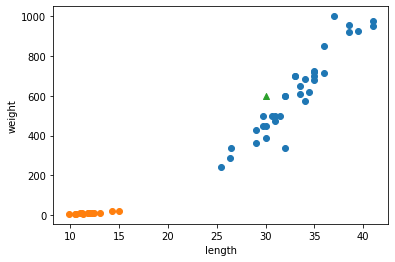

In [6]:
# 새로운 데이터 삽입
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 데이터 다루기
numpy를 이용한 데이터 다루기

In [ ]:
import numpy as np

# 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr.shape)

# 순차적으로 증가하는 인덱스
index = np.arange(49)
print(index)

# 넘파이 배열의 인덱싱
print(input_arr[[1,3]]) # 2번째와 4번째를 출력한 것
train_input = input_arr[index[:35]]
train_traget = target_arr[index[:35]]
print(input_arr[13], train_input[0])

In [15]:
from sklearn.model_selection import train_test_split

# sklearn으로 훈련 세트와 테스트 세트 나누기
# train_test_split은 기본적으로 3:1로 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

# 데이터 전처리
표준 점수: 가장 많이 사용되고 있다. 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.

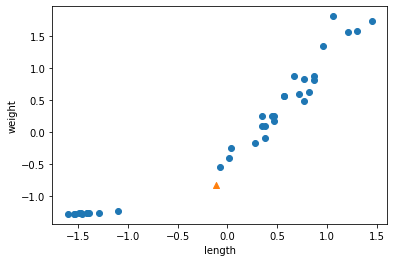

In [21]:
# 넘파이에서 편리하게도 함수를 지원한다
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) /std

# 적용
newdata = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(newdata[0], newdata[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [23]:
# 스케일링 된 데이터로 학습
kn.fit(train_scaled, train_target) # kn은 k-nn알고리즘 블록에서 먼저 실행해서 생성
test_acc = kn.score(test_scaled, test_target)
print("테스트 세트에 대한 정확도: ", test_acc)
print("새로운 데이터에 대한 분류: ", kn.predict([newdata]))

테스트 세트에 대한 정확도:  1.0
새로운 데이터에 대한 분류:  [1]


# K-nn 알고리즘

In [4]:
# KNN으로 분류
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

kn.score(fish_data, fish_target)

1.0

In [ ]:
kn.predict([[30, 600]])
print(kn._fit_X)
print(kn._y)

In [10]:
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

# print(35/49)

0.7142857142857143